In [54]:
import pandas as pd
import seaborn as sns

In [28]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , Conv2D
from tensorflow.keras.optimizers import Adam , RMSprop , SGD ,Adamax

In [60]:
from tensorflow.keras import layers

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 15s 0us/step


(50000, 32, 32, 3)

In [3]:
X_train.shape ,y_train.shape,X_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:
X_train.ndim

4

In [6]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
X_train[0].shape


(32, 32, 3)

In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
y_train = y_train.ravel()

In [10]:
y_train           # single dimension enough to our training

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

# classes of objects by convense the index

Text(0.5, 1.0, 'airplane')

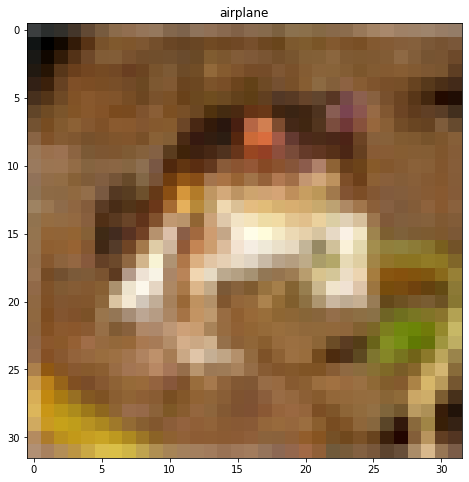

In [12]:
plt.figure(figsize=(8,8))
plt.imshow(X_train[0])
plt.title(classes[0])

In [13]:
def plotimage(x):
  plt.imshow(X_train[x])
  output = y_train[x]
  plt.title(classes[output])

  # function for image with title name

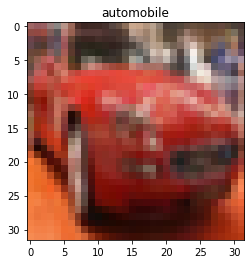

In [14]:
plotimage(5)

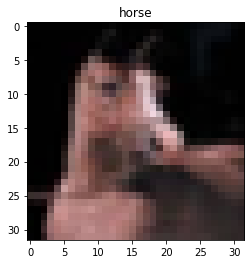

In [15]:
plotimage(85)


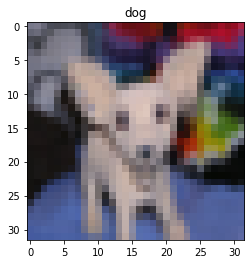

In [16]:
plotimage(285)


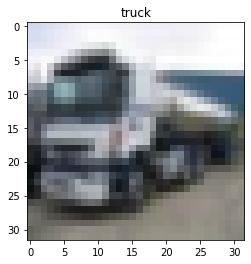

In [17]:
plotimage(225)


normalize the pixel value in 0 and 1 range

In [18]:
x_train = X_train/255.0
x_test = X_test/255.0

In [19]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

<function matplotlib.pyplot.show(*args, **kw)>

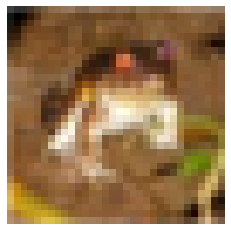

In [20]:
plt.imshow(x_train[0])
plt.axis('off')
plt.show
# draw the image after normalize the image size

In [21]:
def plotimg(x):
  plt.imshow(x_train[x])
  output = y_train[x]
  plt.title(classes[output])
  plt.axis('off')
  plt.show()

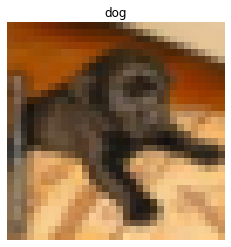

In [22]:
plotimg(56)

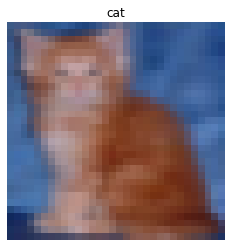

In [23]:
plotimg(91)

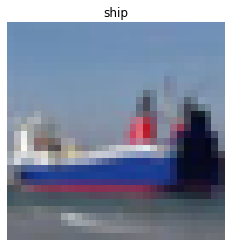

In [24]:
plotimg(106)

In [25]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000,), (10000, 1))

In [26]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [29]:

x_train.shape
 # feature is 32*32 and 50000 images exist and 3 is a rgb channel

(50000, 32, 32, 3)

In [30]:
len(classes)
# 10 output

10

First by using ANN

In [48]:
# ANN LAYERS SPECIFIED

model1 = Sequential([
    layers.Flatten(input_shape=(32,32,3)),         #keep remember this point
    Dense(units = 250 , kernel_initializer='he_uniform',activation='relu'),        # flatten layer
    Dense(units = 150 , kernel_initializer='he_uniform',activation='relu') ,     # hidden layer
    Dense(units = 70 , kernel_initializer='he_uniform',activation='relu')   , # hidden layer
    Dense(units = 10 , kernel_initializer='he_uniform',activation='softmax')   # output layer output neuron based on the output category
])

In [49]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_12 (Dense)            (None, 250)               768250    
                                                                 
 dense_13 (Dense)            (None, 150)               37650     
                                                                 
 dense_14 (Dense)            (None, 70)                10570     
                                                                 
 dense_15 (Dense)            (None, 10)                710       
                                                                 
Total params: 817,180
Trainable params: 817,180
Non-trainable params: 0
_________________________________________________________________


In [50]:
adam_withmanual_lr = Adam(lr=0.003)
adam_withmanual_lr

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [51]:

model1.compile(loss = 'sparse_categorical_crossentropy',optimizer=adam_withmanual_lr , metrics = ['accuracy'])

In [47]:
# history  = model.fit(x_train,y_train, validation_data=(x_test,y_test),validation_split=0.33,batch_size=30,epochs=30)

In [52]:
history = model1.fit(x_train,y_train , epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 3ms/step - loss: 1.9406 - accuracy: 0.2968
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7726 - accuracy: 0.3603
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7199 - accuracy: 0.3856
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6831 - accuracy: 0.3978
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6537 - accuracy: 0.4090
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6399 - accuracy: 0.4124
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6230 - accuracy: 0.4174
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6082 - accuracy: 0.4248
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5942 - accuracy: 0.4296
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.585

accuracy by ANN 

In [56]:
pd.DataFrame(history.history)

,loss,accuracy
0,1.940624,0.29680
1,1.772599,0.36034
2,1.719869,0.38556
3,1.683141,0.39778
4,1.653673,0.40898
5,1.639920,0.41236
6,1.622985,0.41744
7,1.608230,0.42478
8,1.594181,0.42958
9,1.585268,0.43596


In [57]:
model1.evaluate(x_test,y_test)

# i got 45% accuracy by the ANN

313/313 [==============================] - 1s 2ms/step - loss: 1.5966 - accuracy: 0.4336


[1.596632957458496, 0.4336000084877014]

In [59]:
# classification report of ANN Model
 
import numpy as np
y_pred = model1.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.46      0.54      0.50      1000
           1       0.57      0.53      0.55      1000
           2       0.30      0.33      0.31      1000
           3       0.29      0.20      0.24      1000
           4       0.31      0.51      0.38      1000
           5       0.45      0.32      0.37      1000
           6       0.40      0.51      0.45      1000
           7       0.53      0.46      0.49      1000
           8       0.59      0.51      0.55      1000
           9       0.57      0.43      0.49      1000

    accuracy                           0.43     10000
   macro avg       0.45      0.43      0.43     10000
weighted avg       0.45      0.43      0.43     10000



In [63]:

y_pred_classes[0:5]   # predicted value

[3, 9, 8, 0, 4]

In [65]:

y_test[0:5].ravel()   # actual value

array([3, 8, 8, 0, 6], dtype=uint8)

And now i will try this project by the CNN

In [66]:
CNNModel = Sequential([
    layers.Conv2D(filters=40,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)) ,   # cnn layer with input kernelsize = filtersize
    layers.MaxPooling2D((2,2)),# this Maxpolling2D size you can 
    layers.Conv2D(filters=30,kernel_size=(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2))     ,

    layers.Flatten(),  # you don,t need to specifi the shape in middle because it can detact autometicly
    layers.Dense(units= 50 ,activation = 'relu'),
    layers.Dense(units= 20,activation= 'relu'),
    layers.Dense(units=10,activation='softmax')  # this is output layer which conataing 10 neuron, bcz in my datset 10 categoris
  
        
])

In [67]:
# compile the CNN model

CNNModel.compile(loss='sparse_categorical_crossentropy',optimizer=adam_withmanual_lr,metrics=['accuracy'])

In [68]:

history = CNNModel.fit(x_train,y_train , epochs=30)

Epoch 1/30
1563/1563 [==============================] - 15s 4ms/step - loss: 2.3039 - accuracy: 0.0991
Epoch 2/30
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3031 - accuracy: 0.0994
Epoch 3/30
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3031 - accuracy: 0.0990
Epoch 4/30
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3031 - accuracy: 0.0978
Epoch 5/30
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3031 - accuracy: 0.0974
Epoch 6/30
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3031 - accuracy: 0.0983
Epoch 7/30
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3031 - accuracy: 0.0988
Epoch 8/30
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3030 - accuracy: 0.0993
Epoch 9/30
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3030 - accuracy: 0.1001
Epoch 10/30
1563/1563 [==============================] - 6s 4ms/step - loss: 2.30

In [70]:
pd.DataFrame(history.history)

,loss,accuracy
0,2.303909,0.09914
1,2.303102,0.09944
2,2.303115,0.09898
3,2.303101,0.09776
4,2.303092,0.09736
5,2.303060,0.09828
6,2.303110,0.09880
7,2.303020,0.09932
8,2.303030,0.10014
9,2.303044,0.09916


some changes in network because i got bad accuracy

In [71]:
 # this is good network i got maximum accuracy by this model

CNNModel2 = Sequential([
    layers.Conv2D(filters=40,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)) ,   # cnn layer with input kernelsize = filtersize
    layers.MaxPooling2D((2,2)),# this Maxpolling2D size you can 
    layers.Conv2D(filters=30,kernel_size=(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2))     ,

    layers.Flatten(),  # you don,t need to specifi the shape in middle because it can detact autometicly
    layers.Dense(units= 65 ,activation = 'relu'),
    layers.Dense(units=10,activation='softmax')  # this is output layer which conataing 10 neuron, bcz in my datset 10 categoris
  
        
])

In [72]:
CNNModel2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [73]:
history2 = CNNModel2.fit(x_train, y_train , epochs=15)

Epoch 1/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4718 - accuracy: 0.4699
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1310 - accuracy: 0.6014
Epoch 3/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0063 - accuracy: 0.6488
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9268 - accuracy: 0.6778
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8622 - accuracy: 0.6985
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8200 - accuracy: 0.7143
Epoch 7/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7695 - accuracy: 0.7312
Epoch 8/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7309 - accuracy: 0.7437
Epoch 9/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6978 - accuracy: 0.7573
Epoch 10/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.667

i am increasing the epochs, because i seen my previous traing i getting 1% accuracy at each epochs.

In [74]:
history3 = CNNModel2.fit(x_train, y_train , epochs=25)

Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5159 - accuracy: 0.8168
Epoch 2/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4920 - accuracy: 0.8255
Epoch 3/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4749 - accuracy: 0.8312
Epoch 4/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4529 - accuracy: 0.8382
Epoch 5/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4348 - accuracy: 0.8448
Epoch 6/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4179 - accuracy: 0.8506
Epoch 7/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4046 - accuracy: 0.8546
Epoch 8/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3858 - accuracy: 0.8630
Epoch 9/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3626 - accuracy: 0.8697
Epoch 10/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.354

In [81]:
histo = pd.DataFrame(history3.history)
histo

,loss,accuracy
0,0.515922,0.81684
1,0.492003,0.82548
2,0.474922,0.83118
3,0.452949,0.83816
4,0.434838,0.84480
5,0.417863,0.85056
6,0.404598,0.85458
7,0.385841,0.86302
8,0.362574,0.86972
9,0.354551,0.87426


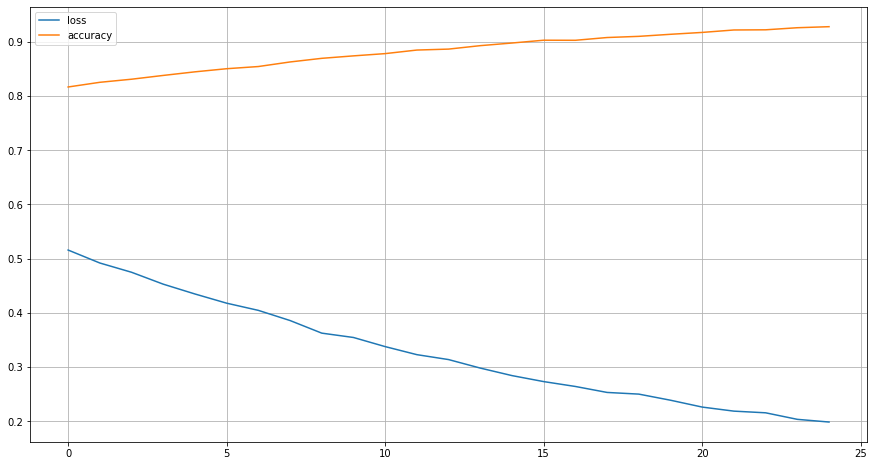

In [82]:
histo.plot(figsize=(15,8))
plt.grid(True)
# plt.gca().set_ylim(0,1)     # set the in between 0 to 1
plt.show()

In [88]:
CNNModel2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.0293 - accuracy: 0.6630


[2.029263496398926, 0.6629999876022339]

In [122]:
CNNModel2.save('/content/drive/MyDrive/cifar10_image_recogintion/cifarmodel10.h5')


In [86]:
model = tf.keras.models.load_model('/content/drive/MyDrive/cifar10_image_recogintion/cifarmodel10.h5')

In [91]:
first_five = model.predict(x_test[0:5])

In [92]:
first_five        # i have probability value i will extract from this higher probability

array([[1.2594677e-11, 1.2825146e-14, 1.1540112e-09, 1.6968623e-02,
        1.9960245e-11, 9.8303002e-01, 1.3962174e-06, 1.7594186e-13,
        1.1225134e-09, 1.9209077e-09],
       [1.7979669e-09, 7.6566212e-04, 9.7765721e-21, 3.6753988e-18,
        3.9668545e-28, 1.8321945e-24, 8.3084446e-22, 1.4967997e-29,
        9.9923432e-01, 2.7589342e-10],
       [4.6817477e-05, 2.8984054e-04, 8.0999320e-07, 5.4755685e-07,
        3.2921700e-11, 4.0009676e-09, 2.5806224e-10, 4.5730451e-11,
        9.9966192e-01, 1.4526506e-07],
       [8.6420381e-01, 1.7812612e-08, 2.3841095e-04, 1.1329747e-05,
        3.0352492e-09, 9.6019005e-11, 1.2742958e-05, 3.0214034e-13,
        1.3553365e-01, 6.1845046e-10],
       [7.4324522e-12, 1.5757181e-14, 4.9666505e-02, 2.1577953e-01,
        1.7149707e-02, 5.9435820e-06, 7.1739829e-01, 2.9149392e-09,
        1.2302555e-09, 8.4939611e-11]], dtype=float32)

In [93]:
first_five_prediction = [np.argmax(elements) for elements in first_five]
first_five_prediction

[5, 8, 8, 0, 6]

In [90]:
y_test[0:5].ravel()

array([3, 8, 8, 0, 6], dtype=uint8)

check the prediction by the image

In [116]:
def prediction_matchingimge(x):

  plt.imshow(x_test[x])
  output = y_test[x][0]
  plt.title(classes[output])
  # plt.imshow(y_pred[x])
  plt.axis('off')
  plt.show()

In [95]:
y_pred = model.predict(x_test)

In [96]:
def predicted_func(x):
  plt.imshow(y_pred[x])
  plt.axis('off')
  plt.show()

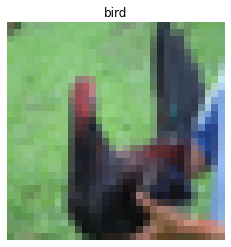

In [105]:
prediction_matchingimge(25)       # from y_test

In [109]:
classes[np.argmax(y_pred[25])]     # name prediction of bird

'bird'

😁😁😁😀

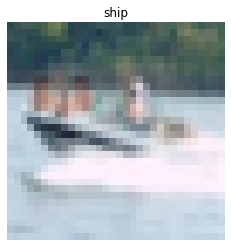

In [117]:
prediction_matchingimge(9015)

In [118]:
classes[np.argmax(y_pred[9015])]        # very good prediction

'ship'

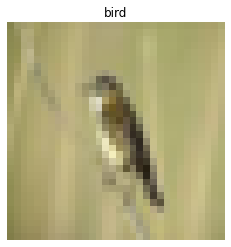

In [120]:
prediction_matchingimge(5015)


In [121]:
classes[np.argmax(y_pred[5015])] 

'bird'

project finished thank you 😋😎😎